Completed EDA + Hypothesis Test 1 on 10/1/2026

Completed Hypothesis Test 2 & 3 on 11/1/2026

6. Feature Engineering
7. Model Building
8. Model Evaluation
9. Business Recommendations

# 1. Problem Context
Customer churn refers to customers who stop using a company’s service.
Understanding churn patterns helps businesses identify high-risk customer groups and take preventive actions.

In this analysis, we explore how churn varies across contract types and gender, helping us understand whether contractual commitment and demographic factors influence customer retention.


# 2. Objective of This Analysis

The objective of this EDA is to:

* Analyze churn behavior across different contract types

* Examine whether gender has a noticeable impact on churn rates

* Identify customer segments with higher churn risk

* Generate insights that can support retention strategies

# 3. Exploratory Data Analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/blastchar/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv
/kaggle/input/telco-customer-churn/__results__.html
/kaggle/input/telco-customer-churn/__resultx__.html
/kaggle/input/telco-customer-churn/__notebook__.ipynb
/kaggle/input/telco-customer-churn/__output__.json
/kaggle/input/telco-customer-churn/churn_histogram.png
/kaggle/input/telco-customer-churn/custom.css
/kaggle/input/telco-customer-churn/__results___files/__results___38_1.png
/kaggle/input/telco-customer-churn/__results___files/__results___24_14.png
/kaggle/input/telco-customer-churn/__results___files/__results___24_3.png
/kaggle/input/telco-customer-churn/__results___files/__results___20_0.png
/kaggle/input/telco-customer-churn/__results___files/__results___24_5.png
/kaggle/input/telco-customer-churn/__results___files/__results___24_0.png
/kaggle/input/telco-customer-churn/__results___files/__results___24_7.png
/kaggle/input/telco-customer-churn/__results___files/__results___24_11.png
/kaggle/inpu

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Data Reading and Preprocessing

In [3]:
df = pd.read_csv("/kaggle/input/d/blastchar/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [5]:
print(df.tail())

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes  

In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
print(df.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [8]:
print(df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
print(df.duplicated().sum())


0


In [10]:
print(df.describe())


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [11]:
print(df.describe(include = "O"))

        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     3186-AJIEK   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq

In [12]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


   gender        Contract  Churn_rate
0  Female  Month-to-month    0.437403
1  Female        One year    0.104457
2  Female        Two year    0.026036
3    Male  Month-to-month    0.416923
4    Male        One year    0.120530
5    Male        Two year    0.030588


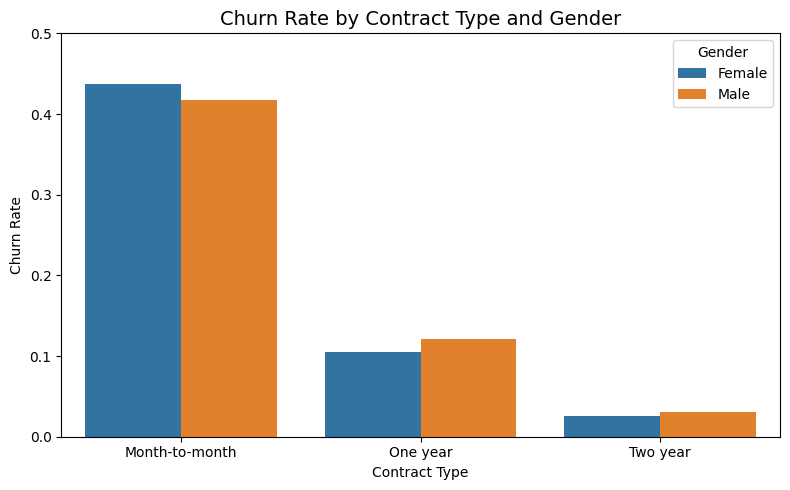

In [13]:
#Gender types VS Churn Rates
churn_rate = (df.groupby(["gender", "Contract"])["Churn"].mean().reset_index().rename(columns={"Churn":"Churn_rate"}))
print(churn_rate)
plt.figure(figsize=(8,5))
sns.barplot(
    data=churn_rate,
    x = "Contract",
    y = "Churn_rate",
    hue = "gender"
)
plt.title("Churn Rate by Contract Type and Gender", fontsize=14)
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate")
plt.ylim(0, 0.5)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

The bar chart shows that customers with month-to-month contracts have the highest churn rate, while churn decreases significantly for one-year and two-year contracts.
**Contract duration has a stronger influence on churn than gender.**

  Partner Dependents  Churn_rate
0      No         No    0.342378
1      No        Yes    0.213296
2     Yes         No    0.254083
3     Yes        Yes    0.142367


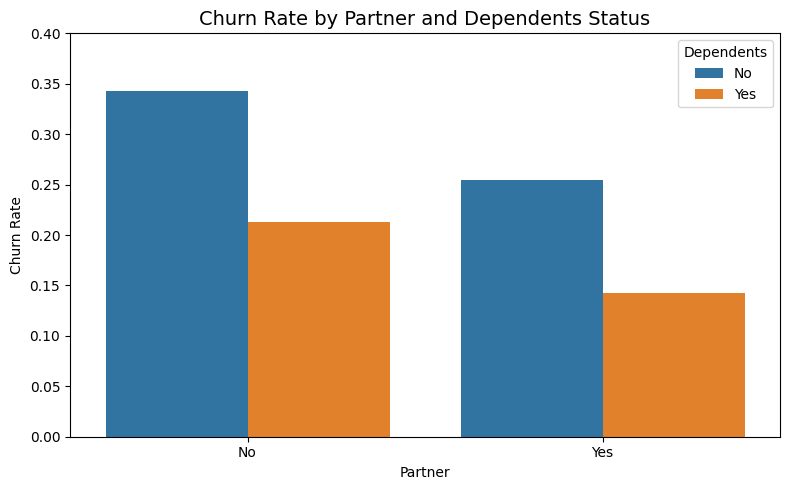

In [14]:
#Partner/Dependents VS Churn Rate
partner_churn = (df.groupby(["Partner","Dependents"])["Churn"].mean()
                .reset_index().rename(columns = {"Churn":"Churn_rate"}))
print(partner_churn)
plt.figure(figsize=(8,5))
sns.barplot(
    data=partner_churn,
    x="Partner",
    y="Churn_rate",
    hue="Dependents"
)
plt.title("Churn Rate by Partner and Dependents Status", fontsize=14)
plt.xlabel("Partner")
plt.ylabel("Churn Rate")
plt.ylim(0, 0.4)
plt.legend(title="Dependents")
plt.tight_layout()
plt.show()

The plot illustrates that the majority of customers do not churn, while a smaller but significant portion exits the service.

/tmp/ipykernel_55/1392637542.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("tenure_group")["Churn"].mean().reset_index()
/tmp/ipykernel_55/1392637542.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


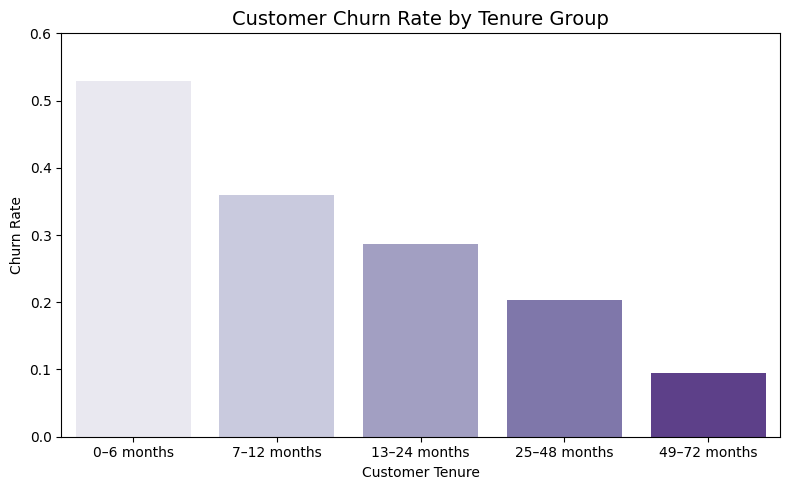

In [15]:
# Tenure VS Churn Rate
df["tenure_group"] = pd.cut(
    df["tenure"],
    bins = [0,6,12,24,48,72],
    labels = [
        "0–6 months",
        "7–12 months",
        "13–24 months",
        "25–48 months",
        "49–72 months"
    ],
    include_lowest = True
)
tenure_churn = (
    df.groupby("tenure_group")["Churn"].mean().reset_index()
    .rename(columns={"Churn": "Churn_rate"})
)
plt.figure(figsize=(8,5))
sns.barplot(
    data=tenure_churn,
    x="tenure_group",
    y="Churn_rate",
    palette="Purples"
)
plt.title("Customer Churn Rate by Tenure Group", fontsize=14)
plt.xlabel("Customer Tenure")
plt.ylabel("Churn Rate")
plt.ylim(0, 0.6)

# Layout
plt.tight_layout()
plt.show()

Customers with lower tenure show higher churn rates, whereas churn decreases as tenure increases. This suggests that long-term customers are more loyal and less likely to discontinue the service.

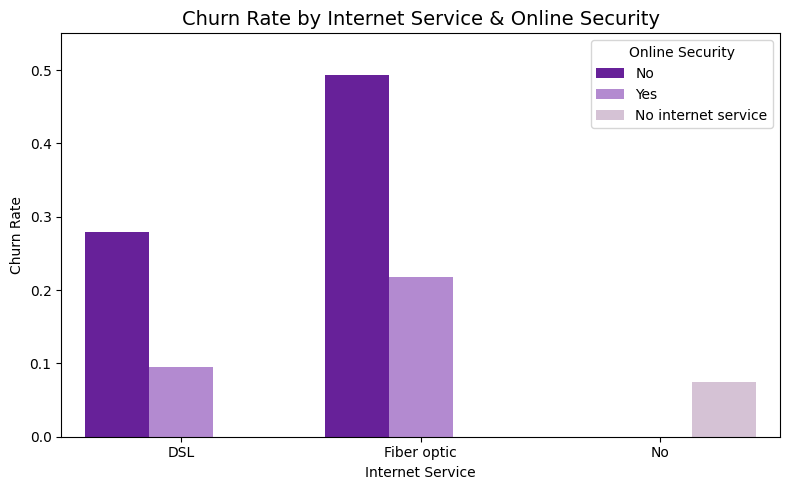

In [16]:
# Online Security VS Churn Rate
internet_churn = df.groupby(["InternetService","OnlineSecurity"])["Churn"].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(
    data=internet_churn,
    x="InternetService",
    y="Churn",
    hue="OnlineSecurity",
    palette=["#6A0DAD","#B57EDC","#D8BFD8"]
)
plt.title("Churn Rate by Internet Service & Online Security", fontsize=14)
plt.xlabel("Internet Service")
plt.ylabel("Churn Rate")
plt.ylim(0,0.55)
plt.legend(title="Online Security")
plt.tight_layout()
plt.show()

Customers using fiber optic internet service exhibit higher churn compared to those using DSL or no internet service, possibly due to cost or service quality expectations.

In [17]:
#Common payment method used by customers
print(df["PaymentMethod"].value_counts())

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


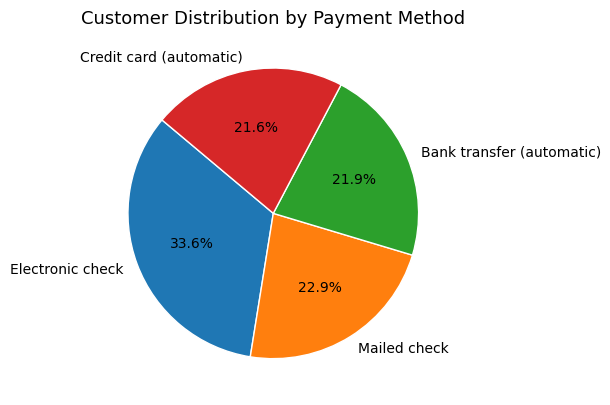

In [18]:
payment_counts = df["PaymentMethod"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    payment_counts.values,
    labels=payment_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    wedgeprops={"edgecolor": "white"}
)
plt.title("Customer Distribution by Payment Method", fontsize=13)
plt.tight_layout()
plt.show()

Higher churn is observed among customers using electronic check payments, while customers using automatic payment methods show lower churn, indicating improved retention with automated billing.

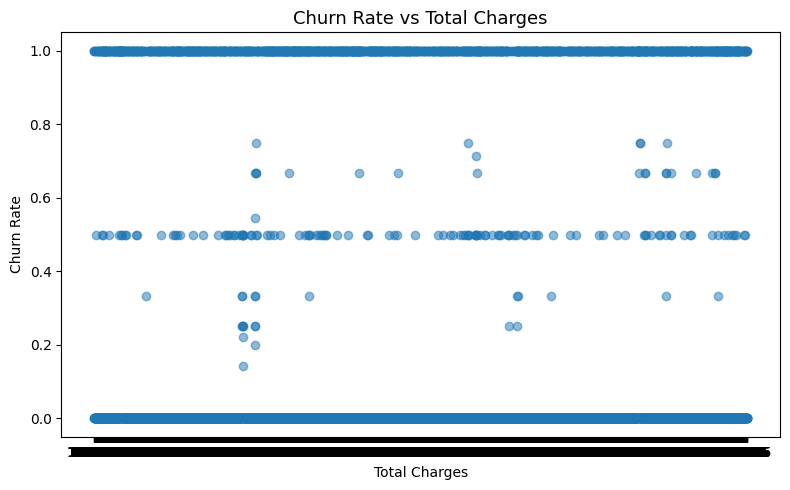

In [19]:
#Churn behaviour change with increasing total charges
data = df.groupby("TotalCharges")["Churn"].mean().reset_index()
plt.figure(figsize=(8,5))
plt.scatter(
    data["TotalCharges"],
    data["Churn"],
    alpha=0.5
)
plt.title("Churn Rate vs Total Charges", fontsize=13)
plt.xlabel("Total Charges")
plt.ylabel("Churn Rate")
plt.tight_layout()
plt.show()

The plot indicates that customers with higher monthly charges tend to churn more frequently, suggesting that pricing may be a contributing factor to customer dissatisfaction.

# 4. Hypothesis Testing

Why hypothesis testing?

EDA showed patterns, but hypothesis testing helps to statistically validate whether those patterns were significant or due to random variation.

### 4.1 Hypothesis Test 1: Contract Type vs Churn

**Question:**
Does the type of contract a customer has affect whether they churn?

**Null Hypothesis(H0)**
There is **no association** between contract type and customer churn.

**Alternative Hypothesis(H1)**
There is a **significant association** between contract type and customer churn.

In [20]:
#Contingency Table
import pandas as pd

contingency_table = pd.crosstab(df['Contract'], df['Churn'])
contingency_table

Churn,0,1
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [21]:
#Performing Chi-Square Test

from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-square Statistic:", chi2)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H₀: Contract type significantly affects churn")
else:
    print("Fail to reject H₀: No significant relationship")

Chi-square Statistic: 1184.5965720837926
p-value: 5.863038300673391e-258
Reject H₀: Contract type significantly affects churn


The Chi-Square test resulted in a p-value of < 0.05, indicating a statistically significant association between contract type and customer churn.
Therefore, we reject the null hypothesis. **Contract length strongly affects churn**

### 4.2 Hypothesis Test 2: Monthly Charges vs Churn

**Question:** Do monthly charges differ significantly between churned and non-churned customers?

**Null Hypothesis(H0)** : There is no significant difference in monthly charges between churned and non-churned customers.

**Alternative Hypothesis(H1)** : There is a significant difference in monthly charges between churned and non-churned customers.

**Why:**
Higher bills → dissatisfaction → churn.



In [22]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [23]:
from scipy.stats import ttest_ind

df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
churned = df[df['Churn'] == 1]['MonthlyCharges'].dropna()
not_churned = df[df['Churn'] == 0]['MonthlyCharges'].dropna()
print("Churned count:", churned.shape[0])
print("Not churned count:", not_churned.shape[0])

t_stat, p_value = ttest_ind(churned, not_churned, equal_var = False)

print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H₀: Monthly charges differ significantly")
else:
    print("Fail to reject H₀")

Churned count: 1869
Not churned count: 5174
t-statistic: 18.407526676414673
p-value: 8.59244933154705e-73
Reject H₀: Monthly charges differ significantly


The independent two-sample t-test resulted in a p-value of < 0.05, indicating a statistically significant difference in monthly charges between churned and non-churned customers. Therefore, the null hypothesis is rejected.

(Welch’s t-test is used because it is more robust when the two groups may have unequal variances, which is common in real-world customer data.)

### 4.3 Hypothesis Test 3: Tenure vs Churn

**Question:** Is there a significant difference in tenure between churned and non-churned customers?

**Null Hypothesis(H0) :** There is no significant difference in tenure between churned and non-churned customers.

**Alternative Hypothesis(H1) :** There is a significant difference in tenure between churned and non-churned customers.


In [24]:
import pandas as pd
from scipy.stats import ttest_ind

df['Churn'] = df['Churn'].astype(int)

churned_tenure = df[df['Churn'] == 1]['tenure'].dropna()
not_churned_tenure = df[df['Churn'] == 0]['tenure'].dropna()


print("Churned tenure count:", churned_tenure.shape[0])
print("Not churned tenure count:", not_churned_tenure.shape[0])

t_stat, p_value = ttest_ind(
    churned_tenure,
    not_churned_tenure,
    equal_var=False  # Welch's t-test
)

print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H₀: Tenure differs significantly between churned and non-churned customers")
else:
    print("Fail to reject H₀")


Churned tenure count: 1869
Not churned tenure count: 5174
t-statistic: -34.823818696312976
p-value: 1.1954945472607151e-232
Reject H₀: Tenure differs significantly between churned and non-churned customers


Welch’s t-test resulted in a p-value < 0.05, indicating a statistically significant difference in tenure between churned and non-churned customers. Hence, the null hypothesis is rejected.

Customers who churn generally have significantly lower tenure, suggesting that early-stage customers are at higher risk of churn and require stronger onboarding and engagement strategies.

# Feature Engineering

In [25]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [26]:
selected_features = [
    "tenure",
    "MonthlyCharges",
    "TotalCharges",
    "Contract",
    "InternetService",
    "PaymentMethod"
]

data = df[selected_features + ['Churn']].copy()
data

,tenure,MonthlyCharges,TotalCharges,Contract,InternetService,PaymentMethod,Churn
0,1,29.85,29.85,Month-to-month,DSL,Electronic check,0
1,34,56.95,1889.5,One year,DSL,Mailed check,0
2,2,53.85,108.15,Month-to-month,DSL,Mailed check,1
3,45,42.30,1840.75,One year,DSL,Bank transfer (automatic),0
4,2,70.70,151.65,Month-to-month,Fiber optic,Electronic check,1
...,...,...,...,...,...,...,...
7038,24,84.80,1990.5,One year,DSL,Mailed check,0
7039,72,103.20,7362.9,One year,Fiber optic,Credit card (automatic),0
7040,11,29.60,346.45,Month-to-month,DSL,Electronic check,0
7041,4,74.40,306.6,Month-to-month,Fiber optic,Mailed check,1


In [27]:
data['tenure'] = pd.to_numeric(data['tenure'], errors='coerce')
data['MonthlyCharges'] = pd.to_numeric(data['MonthlyCharges'], errors='coerce')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.dropna()

In [28]:
data

,tenure,MonthlyCharges,TotalCharges,Contract,InternetService,PaymentMethod,Churn
0,1,29.85,29.85,Month-to-month,DSL,Electronic check,0
1,34,56.95,1889.50,One year,DSL,Mailed check,0
2,2,53.85,108.15,Month-to-month,DSL,Mailed check,1
3,45,42.30,1840.75,One year,DSL,Bank transfer (automatic),0
4,2,70.70,151.65,Month-to-month,Fiber optic,Electronic check,1
...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,One year,DSL,Mailed check,0
7039,72,103.20,7362.90,One year,Fiber optic,Credit card (automatic),0
7040,11,29.60,346.45,Month-to-month,DSL,Electronic check,0
7041,4,74.40,306.60,Month-to-month,Fiber optic,Mailed check,1


In [29]:
data_encoded = pd.get_dummies(
    data,
    columns = ['Contract', 'InternetService','PaymentMethod'],
    drop_first = True
)
#data_encoded
x = data_encoded.drop('Churn',axis = 1)
y = data_encoded['Churn']

print(x)
print(y)

      tenure  MonthlyCharges  TotalCharges  Contract_One year  \
0          1           29.85         29.85              False   
1         34           56.95       1889.50               True   
2          2           53.85        108.15              False   
3         45           42.30       1840.75               True   
4          2           70.70        151.65              False   
...      ...             ...           ...                ...   
7038      24           84.80       1990.50               True   
7039      72          103.20       7362.90               True   
7040      11           29.60        346.45              False   
7041       4           74.40        306.60              False   
7042      66          105.65       6844.50              False   

      Contract_Two year  InternetService_Fiber optic  InternetService_No  \
0                 False                        False               False   
1                 False                        False               

In [30]:
x.shape

(7032, 10)

In [31]:
y.shape

(7032,)

Based on EDA and hypothesis testing, key numerical and categorical features associated with churn were selected. Categorical variables were one-hot encoded, and numerical variables were cleaned to ensure suitability for modeling.

# Model Building

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 42,
    stratify = y
)

print(x_train.shape, x_test.shape)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


(5625, 10) (1407, 10)


In [33]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter = 1000,
                            class_weight = 'balanced')
log_reg.fit(x_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [34]:
y_pred = log_reg.predict(x_test_scaled)
y_prob = log_reg.predict_proba(x_test_scaled)[:, 1]

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1033
           1       0.48      0.81      0.60       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.71      0.73      1407



In [36]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score: ", roc_auc)

ROC-AUC Score:  0.8320115338223646


Logistic regression achieved a ROC-AUC score of 0.83, indicating good discriminative ability.
Recall for churned customers was prioritized to minimize false negatives, ensuring high-risk customers are correctly identified.

The model can identify customers at high risk of churn, enabling the business to proactively intervene with retention strategies such as personalized offers or improved onboarding.

#### Coefficient Interpretation

In [38]:
feature_names = x.columns
coefficients = log_reg.coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient' : coefficients
})

coef_df = coef_df.sort_values(by = 'Coefficient', ascending = False)
coef_df

,Feature,Coefficient
2,TotalCharges,0.628932
5,InternetService_Fiber optic,0.515066
8,PaymentMethod_Electronic check,0.256521
7,PaymentMethod_Credit card (automatic),0.026003
9,PaymentMethod_Mailed check,-0.002897
1,MonthlyCharges,-0.148720
3,Contract_One year,-0.372360
6,InternetService_No,-0.399236
4,Contract_Two year,-0.737697
0,tenure,-1.214632


#### Positive Coefficients = Increase Churn Risk

* **Total Charges(0.628932)**


  Customers who have paid more overall are more likely to churn which is often linked to dissatisfaction over time or high cost burn

* **InternetService_No(-0.399236)**

    Fiber users churn more which is possibly due to higher cost or service expectations.

* **PaymentMethod_Electronic check (0.026003)**

    These customers are more likely to churn. Common real-world pattern, i.e., less stable payment behaviour.

#### Negative Coefficients = Reduce Churn Risk

* **tenure(-1.21)**


  Longer customers are much less likely to churn(Strongest feature)

* **Contract_Two Year(-0.73)**


  Long-term contracts strongly reduce churn

* **Contract_One Year(-0.37)**


  Even medium-term contract help retention

* **InternetService_No(-0.39)**


  Customers without internet service churn less

The analysis suggests that early-stage customers and those using flexible payment methods are at higher risk of churn. Encouraging customers to adopt long-term contracts and improving retention strategies for fiber optic users could significantly reduce churn.

In [45]:
data_encoded.to_csv("churn_cleaned_data.csv", index=False)

In [46]:
import os
os.listdir()

['churn_cleaned_data.csv', '.virtual_documents']

(Visualization In PowerBI)